## Task 1: Data Loading and data preparation

   Domain                                             Review
0  amazon  Oh and I forgot to also mention the weird colo...
1  amazon                       THAT one didn't work either.
2  amazon                                 Waste of 13 bucks.
3  amazon  Product is useless, since it does not have eno...
4  amazon  None of the three sizes they sent with the hea...
   Label
0      0
1      0
2      0
3      0
4      0
   Domain                                             Review
0  amazon  It only recognizes the Phone as its storage de...
1  amazon  Disappointing accessory from a good manufacturer.
2  amazon  The one big drawback of the MP3 player is that...
3  amazon  This particular model would not work with my M...
4  amazon  If the two were seperated by a mere 5+ ft I st...
   Label
0      0
1      0
2      0
3      0
4      0
Dimensions of train data features: (2400, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
Domain   

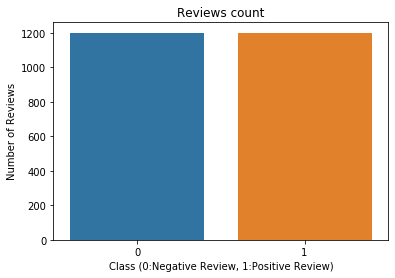

      Domain                                             Review  \
0     amazon  Oh and I forgot to also mention the weird colo...   
1     amazon                       THAT one didn't work either.   
3     amazon  Product is useless, since it does not have eno...   
8     amazon  the only VERY DISAPPOINTING thing was there wa...   
15    amazon                 Don't make the same mistake I did.   
...      ...                                                ...   
2381    yelp  I will continue to come here on ladies night a...   
2384    yelp  Both of them were truly unbelievably good, and...   
2387    yelp  This was my first time and I can't wait until ...   
2394    yelp  I don't have very many words to say about this...   
2396    yelp  I could eat their bruschetta all day it is dev...   

      uppercase_words  
0                   1  
1                   1  
3                   1  
8                   4  
15                  1  
...               ...  
2381                1  
238

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn import preprocessing
%matplotlib inline

#Read the train data
train = pd.read_csv('Dataset/x_train.csv',error_bad_lines=False, warn_bad_lines=True, na_values = ['n/a', '\s+', "N/A"],names = ["Domain", "Review"])
print(train.head())

train_y = pd.read_csv('Dataset/y_train.csv',error_bad_lines=False, warn_bad_lines=True, na_values = ['n/a', '\s+', "N/A"], names = ["Label"])
print(train_y.head())

#Read the test data
test = pd.read_csv('Dataset/x_test.csv',error_bad_lines=False, warn_bad_lines=True, na_values = ['n/a', '\s+', "N/A"],names = ["Domain", "Review"])
print(test.head())

test_y = pd.read_csv('Dataset/y_test.csv',error_bad_lines=False, warn_bad_lines=True, na_values = ['n/a', '\s+', "N/A"], names = ["Label"])
print(test_y.head())

#Dimensions and information of dataframe columns for train data
print("Dimensions of train data features:", train.shape)
print(train.info())
print("Dimensions of train data labels:", train_y.shape)
print(train_y.info())

print(train.describe())#descriptive statistics of train data

print(train_y.describe())#descriptive statistics of train data labels

#Checking the missing values in the train data set
print(train.isnull().any())#columns with null values in train dataset features
print(train_y.isnull().any())#columns with null values in train labels

Count_label = train_y["Label"].value_counts()#checking the number of counts for each type of value in train label data
print('Count for labels:')
print(Count_label)

sns.barplot(x = Count_label.index, y = Count_label)
plt.xlabel('Class (0:Negative Review, 1:Positive Review)')
plt.ylabel("Number of Reviews")
plt.title("Reviews count")
plt.show()

#counting the number of uppercase words in each review in train data
train['uppercase_words'] = train['Review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df_upper = train[train["uppercase_words"] != 0]#rows having uppercase words
print(df_upper)
print("number of reviews having uppercase words in train data:", len(df_upper.index))

#converting the words in reveiws from upper case to lower case in train data
train['Review'] = train['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['uppercase_words'] = train['Review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))#counting the uppercase words after converting reviews to lowercase
print("-----------------------------------------------------------------")
print("After converting review words to lower case in train data")
df_upper = train[train["uppercase_words"] != 0]#rows having uppercase words
print(df_upper)
print("number of reviews having uppercase words after converting to lowercase in train data:", len(df_upper.index))

#counting the number of punctuations in each review in train data
punct = string.punctuation
train['num_punctuation'] = train['Review'].apply(lambda x: len([x for x in x.split() if x in punct]))
df_punc = train[train["num_punctuation"] != 0]#rows having uppercase words
print(df_punc)
print("number of reviews having punctuations in train data:", len(df_punc.index))

#Removing the punctuations from reviews in train data

def punct_remove(rev):
    return rev.translate(str.maketrans('', '', punct))

train['Review'] = train['Review'].apply(lambda x: punct_remove(x))
train['num_punctuation'] = train['Review'].apply(lambda x: len([x for x in x.split() if x in punct]))#counting punctuations
print("-----------------------------------------------------------------")
print("After removing the punctuations from reviews in train data")
df_punc = train[train["num_punctuation"] != 0]
print(df_punc)
print("number of reviews having punctuations after removing punctuations in train data:",len(df_punc.index))

train.drop(['uppercase_words', 'num_punctuation'], axis = 1, inplace=True)##removing uppercase_words and num_punctuation columns in train data
print(train.head())
print(train.shape)

#Preprocessing the test data
#Dimensions and information of dataframe columns for test data
print("Dimensions of test data:")
print(test.shape)
print(test.info())
print(test_y.shape)
print(test_y.info())

#Checking the missing values in the test data set
print(test.isnull().any())#columns with null values in test dataset features
print(test_y.isnull().any())#columns with null values in test label features

#counting the number of uppercase words in each review
test['uppercase_words'] = test['Review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df_upper = test[test["uppercase_words"] != 0]#rows having uppercase words
print(df_upper)
print("number of reviews having uppercase words in test data:", len(df_upper.index))

#converting the words in reveiws from upper case to lower case in test data
test['Review'] = test['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['uppercase_words'] = test['Review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))#counting the uppercase words after converting reviews to lowercase
print("-----------------------------------------------------------------")
print("After converting review words to lower case in test data")
df_upper = test[test["uppercase_words"] != 0]#rows having uppercase words
print(df_upper)
print("number of reviews having uppercase words after converting to lowercase in test data:", len(df_upper.index))

#counting the number of punctuations in each review in test data
punct = string.punctuation
test['num_punctuation'] = test['Review'].apply(lambda x: len([x for x in x.split() if x in punct]))
df_punc = test[test["num_punctuation"] != 0]#rows having uppercase words
print(df_punc)
print("number of reviews having punctuations in test data:", len(df_punc.index))

#Removing the punctuations from reviews
test['Review'] = test['Review'].apply(lambda x: punct_remove(x))
test['num_punctuation'] = test['Review'].apply(lambda x: len([x for x in x.split() if x in punct]))
print("-----------------------------------------------------------------")
print("After removing the punctuations from reviews in test data")
df_punc = test[test["num_punctuation"] != 0]
print(df_punc)
print("number of reviews having punctuations after removing punctuations in test data:",len(df_punc.index))

test.drop(['uppercase_words', 'num_punctuation'], axis = 1, inplace=True)#removing uppercase_words and num_punctuation columns
print(test.head())
print(test.shape)

## Task 2: Feature Representation

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer 
#initializing TfidfVectorizer
tfid = TfidfVectorizer(stop_words="english", analyzer='word', max_features=1000, 
                            ngram_range=(1, 2), max_df = 0.50, min_df = 10)

X_train_1 = tfid.fit_transform(train['Review'])#transforming training data to feature vectors
X_train_1 = X_train_1.toarray()# conversion into array
print("dimension of training features:", X_train_1.shape)
print(X_train_1)

voct = tfid.get_feature_names()#getting the features
print("Vocabulary length:", len(voct))
print(voct[:10])

dftrain = pd.DataFrame(X_train_1, columns = voct)#converting to dataframe
print(dftrain)#training features dataframe

df2 = pd.DataFrame(train['Domain'])
X_train1 = pd.concat((df2, dftrain), axis=1)#combining feature vectors with domain column
print(X_train1)
le = preprocessing.LabelEncoder()
X_train1['Domain'] = le.fit_transform(X_train1['Domain'])##label encoding domain column
print(X_train1)

#transforming test data to bag of words feature vectors
X_test_1 = tfid.transform(test['Review'])#transforming test data to feature vectors
X_test_1 = X_test_1.toarray()# conversion into array
print("dimension of test features:", X_test_1.shape)
print(X_test_1)

voct1 = tfid.get_feature_names()
print("Vocabulary length:",len(voct1))
print(voct1[:10])

dftest = pd.DataFrame(X_test_1, columns = voct1)
print(dftest.head())

df3 = pd.DataFrame(test['Domain'])
X_test1 = pd.concat((df3, dftest), axis=1)#combining feature vectors with domain column
print(X_test1)
X_test1['Domain'] = le.fit_transform(X_test1['Domain'])
print(X_test1)

train_y = np.array(train_y["Label"])
test_y = np.array(test_y["Label"])

dimension of training features: (2400, 242)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Vocabulary length: 242
['10', 'absolutely', 'acting', 'actors', 'actually', 'amazing', 'amp', 'atmosphere', 'avoid', 'away']
       10  absolutely  acting  actors  actually  amazing  amp  atmosphere  \
0     0.0         0.0     0.0     0.0       0.0      0.0  0.0         0.0   
1     0.0         0.0     0.0     0.0       0.0      0.0  0.0         0.0   
2     0.0         0.0     0.0     0.0       0.0      0.0  0.0         0.0   
3     0.0         0.0     0.0     0.0       0.0      0.0  0.0         0.0   
4     0.0         0.0     0.0     0.0       0.0      0.0  0.0         0.0   
...   ...         ...     ...     ...       ...      ...  ...         ...   
2395  0.0         0.0     0.0     0.0       0.0      0.0  0.0         0.0   
2396  0.0         0.0     0.0     0.0       0.0      0.0  0

## Task 3 :Classification and Evaluation

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Splitting the training data into 80% for training and 20% for validation, 
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train1, train_y, test_size=0.2,random_state=0)
                                                
# Check shapes and confirm the rows of training data - 2400*0.8 = 1920
print('Suite1')
print('Training set1')
print(X_train_1.shape, y_train_1.shape)

# Check shapes and confirm the rows of validation data -  2400*0.2 = 480
print('Validation set 1')
print(X_val_1.shape, y_val_1.shape)

# Splitting the training data into 90% for training and 10% for validation, 
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train1, train_y, test_size=0.1,random_state=0)
                                                
# Check shapes and confirm the rows of training data - 2400*0.9 = 2160
print('Suite2')
print('Training set2')
print(X_train_2.shape, y_train_2.shape)

# Check shapes and confirm the rows of validation data -  2400*0.1 = 240
print('Validation set 2')
print(X_val_2.shape, y_val_2.shape)

# Splitting the training data into 70% for training and 30% for validation, 
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(X_train1, train_y, test_size=0.3,random_state=0)
                                                
# Check shapes and confirm the rows of training data - 2400*0.7 = 1680
print('Suite3')
print('Training set3')
print(X_train_3.shape, y_train_3.shape)

# Check shapes and confirm the rows of validation data -  2400*0.3 = 720
print('Validation set 3')
print(X_val_3.shape, y_val_3.shape)


Suite1
Training set1
(1920, 243) (1920,)
Validation set 1
(480, 243) (480,)
Suite2
Training set2
(2160, 243) (2160,)
Validation set 2
(240, 243) (240,)
Suite3
Training set3
(1680, 243) (1680,)
Validation set 3
(720, 243) (720,)


cscores in suite 1: [0.6296875, 0.6432291666666666, 0.6546875, 0.6791666666666667, 0.6984375, 0.7088541666666667, 0.7265624999999999, 0.7322916666666667, 0.7364583333333334, 0.7364583333333333, 0.728125, 0.7250000000000001, 0.7255208333333334, 0.7166666666666666, 0.7119791666666667, 0.7098958333333333, 0.709375, 0.7072916666666667, 0.7031249999999999, 0.6984375, 0.6968750000000001, 0.696875, 0.6968750000000001, 0.6979166666666667, 0.6994791666666668, 0.6984375, 0.6973958333333334, 0.6958333333333334, 0.6953125000000001, 0.6963541666666668, 0.6963541666666668, 0.6984375, 0.6984375, 0.6979166666666667, 0.6979166666666667, 0.6989583333333333, 0.6994791666666668, 0.6994791666666668, 0.6989583333333333, 0.6984375, 0.7000000000000001, 0.6989583333333333, 0.6989583333333333, 0.6968750000000001, 0.6973958333333334, 0.6973958333333334, 0.696875, 0.6963541666666668, 0.6958333333333334, 0.6947916666666668]
Best var_smoothing to use in suite 1: 0.03393221771895328
Naive Bayes model
Performance on 

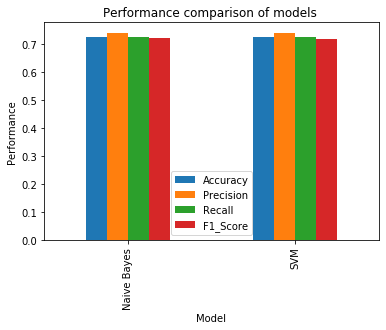

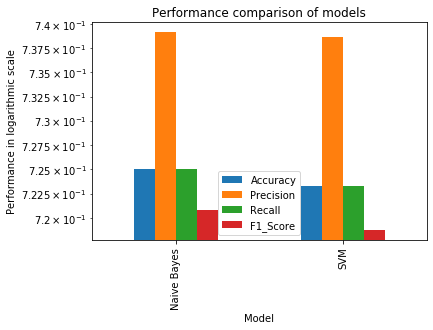

In [4]:
#Naive Bayes Model
#hyperparameter tuning on Suite 1
n = np.logspace(0,-9)
cscore1 = []
for var in n:
    classifier = GaussianNB(var_smoothing=var)
    score = cross_val_score(classifier, X_train_1, y_train_1, cv=10, scoring='accuracy')
    cscore1.append(score.mean())
best_var_smoothing = n[np.argmax(cscore1)]
print('cscores in suite 1:', cscore1 )
print('Best var_smoothing to use in suite 1:', best_var_smoothing)

#Model training on suite 1
classifier = GaussianNB(var_smoothing=best_var_smoothing)
classifier.fit(X_train_1,y_train_1)
y_pred1 = classifier.predict(X_val_1)

# Evaluate the performance of the trained model 
print("Naive Bayes model")
print("Performance on suite1 of validation data")
# Confusion matrix
print('confusion_matrix:')
print(confusion_matrix(y_val_1, y_pred1))

# Accuracy
accuracy1 = accuracy_score(y_val_1, y_pred1)
print('accuracy:', accuracy1)

#Precision
precision1 = precision_score(y_val_1, y_pred1, average='weighted')
print('precision:', precision1)

#Recall
recall1 = recall_score(y_val_1, y_pred1, average='weighted')
print('Recall:', recall1)

#F1 score
F1_score1 = f1_score(y_val_1, y_pred1, average='weighted')
print('f1 score:', F1_score1)

#hyperparameter tuning on Suite 2
n = np.logspace(0,-9)
cscore1 = []
for var in n:
    classifier = GaussianNB(var_smoothing=var)
    score = cross_val_score(classifier, X_train_2, y_train_2, cv=10, scoring='accuracy')
    cscore1.append(score.mean())
best_var_smoothing = n[np.argmax(cscore1)]
print('cscores in suite 1:', cscore1 )
print('Best var_smoothing to use in suite 1:', best_var_smoothing)

#Model training on suite 2
classifier = GaussianNB(var_smoothing=best_var_smoothing)
classifier.fit(X_train_2,y_train_2)
y_pred2 = classifier.predict(X_val_2)

# Evaluate the performance of the trained model 
print("Performance on suite2 of validation data")
# Confusion matrix
print('confusion_matrix:')
print(confusion_matrix(y_val_2, y_pred2))

# Accuracy
accuracy2 = accuracy_score(y_val_2, y_pred2)
print('accuracy:', accuracy2)

#Precision
precision2 = precision_score(y_val_2, y_pred2, average='weighted')
print('precision:', precision2)

#Recall
recall2 = recall_score(y_val_2, y_pred2, average='weighted')
print('Recall:', recall2)

#F1 score
F1_score2 = f1_score(y_val_2, y_pred2, average='weighted')
print('f1 score:', F1_score2)

#hyperparameter tuning on Suite 3
n = np.logspace(0,-9)
cscore1 = []
for var in n:
    classifier = GaussianNB(var_smoothing=var)
    score = cross_val_score(classifier, X_train_3, y_train_3, cv=10, scoring='accuracy')
    cscore1.append(score.mean())
best_var_smoothing = n[np.argmax(cscore1)]
print('cscores in suite 1:', cscore1 )
print('Best var_smoothing to use in suite 1:', best_var_smoothing)

#Model training on suite 3
classifier = GaussianNB(var_smoothing=best_var_smoothing)
classifier.fit(X_train_3,y_train_3)
y_pred3 = classifier.predict(X_val_3)

# Evaluate the performance of the trained model 
print("Performance on suite3 of validation data")
# Confusion matrix
print('confusion_matrix:')
print(confusion_matrix(y_val_3, y_pred3))

# Accuracy
accuracy3 = accuracy_score(y_val_3, y_pred3)
print('accuracy:', accuracy3)

#Precision
precision3 = precision_score(y_val_3, y_pred3, average='weighted')
print('precision:', precision2)

#Recall
recall3 = recall_score(y_val_3, y_pred3, average='weighted')
print('Recall:', recall2)

#F1 score
F1_score3 = f1_score(y_val_3, y_pred3, average='weighted')
print('f1 score:', F1_score3)

#hyperparameter tuning on entire training data
n = np.logspace(0,-9)
cscore1 = []
for var in n:
    classifier = GaussianNB(var_smoothing=var)
    score = cross_val_score(classifier, X_train1, train_y, cv=10, scoring='accuracy')
    cscore1.append(score.mean())
best_var_smoothing = n[np.argmax(cscore1)]
print('cscores:', cscore1 )
print('Best var_smoothing to use:', best_var_smoothing)

# Model training on entire training data
classifier = GaussianNB(var_smoothing=best_var_smoothing)
classifier.fit(X_train1,train_y)
y_pred = classifier.predict(X_test1)

# Evaluate the performance on the test data data 
print("Performance on test data")
# Confusion matrix
print('confusion_matrix:')
print(confusion_matrix(test_y, y_pred))

# Accuracy
accuracy_N = accuracy_score(test_y, y_pred)
print('accuracy:', accuracy_N)

#Precision
precision_N = precision_score(test_y, y_pred, average='weighted')
print('precision:', precision_N)

#Recall
recall_N = recall_score(test_y, y_pred, average='weighted')
print('Recall:', recall_N)

#F1 score
F1_score_N = f1_score(test_y, y_pred, average='weighted')
print('f1 score:', F1_score_N)

#SVM Model
from sklearn import svm
from sklearn.model_selection import GridSearchCV

#Hyperparameter tuning on suite 1
print("SVM Model")
gr_param = {
    'C': [0.1, 1.0, 10, 100, 1000],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

grid_srv = GridSearchCV(estimator=svm.SVC(),param_grid=gr_param,scoring='accuracy',cv=5)
grid_srv.fit(X_train_1,y_train_1)# fitting the model on training data suite 1 to do grid search
# printing best parameter 
param_best = grid_srv.best_params_
print("Best parameters are:", param_best)
# best accuracy
best_acc = grid_srv.best_score_
print("Best Accuracy after grid search cv is:", best_acc)

sv = svm.SVC(C=100, kernel='rbf', gamma=0.01)#using best parameters obtained to train data suite 1
sv.fit(X_train_1,y_train_1)
y_pred1 = sv.predict(X_val_1)

# Evaluate the performance of the trained model 
print("Performance on suite1 of validation data")
# Confusion matrix
print('confusion_matrix:')
print(confusion_matrix(y_val_1, y_pred1))

# Accuracy
accuracy1 = accuracy_score(y_val_1, y_pred1)
print('accuracy:', accuracy1)

#Precision
precision1 = precision_score(y_val_1, y_pred1, average='weighted')
print('precision:', precision1)

#Recall
recall1 = recall_score(y_val_1, y_pred1, average='weighted')
print('Recall:', recall1)

#F1 score
F1_score1 = f1_score(y_val_1, y_pred1, average='weighted')
print('f1 score:', F1_score1)

#Hyperparameter tuning on suite 2
grid_srv.fit(X_train_2,y_train_2)#fitting the model on training data suite 2 to do grid search

# printing best parameter 
param_best = grid_srv.best_params_
print("Best parameters are:", param_best)

# best accuracy
best_acc = grid_srv.best_score_
print("Best Accuracy after grid search cv is:", best_acc)

sv = svm.SVC(C=100, kernel='sigmoid', gamma=0.01)#using best parameters obtained to train data suite 2
sv.fit(X_train_2,y_train_2)
y_pred2 = sv.predict(X_val_2)

# Evaluate the performance of the trained model 
print("Performance on suite2 of validation data")
# Confusion matrix
print('confusion_matrix:')
print(confusion_matrix(y_val_2, y_pred2))

# Accuracy
accuracy2 = accuracy_score(y_val_2, y_pred2)
print('accuracy:', accuracy2)

#Precision
precision2 = precision_score(y_val_2, y_pred2, average='weighted')
print('precision:', precision2)

#Recall
recall2 = recall_score(y_val_2, y_pred2, average='weighted')
print('Recall:', recall2)

#F1 score
F1_score2 = f1_score(y_val_2, y_pred2, average='weighted')
print('f1 score:', F1_score2)

#Hyperparameter tuning on suite 3
grid_srv.fit(X_train_3,y_train_3)#fitting the model on training data suite 3 to do grid search

# printing best parameter 
param_best = grid_srv.best_params_
print("Best parameters are:", param_best)

# best accuracy
best_acc = grid_srv.best_score_
print("Best Accuracy after grid search cv is:", best_acc)

sv = svm.SVC(C=100, kernel='sigmoid', gamma=0.01)#using best parameters obtained to train data suite 3
sv.fit(X_train_3,y_train_3)
y_pred3 = sv.predict(X_val_3)

# Evaluate the performance of the trained model 
print("Performance on suite3 of validation data")
# Confusion matrix
print('confusion_matrix:')
print(confusion_matrix(y_val_3, y_pred3))

# Accuracy
accuracy3 = accuracy_score(y_val_3, y_pred3)
print('accuracy:', accuracy3)

#Precision
precision3 = precision_score(y_val_3, y_pred3, average='weighted')
print('precision:', precision2)

#Recall
recall3 = recall_score(y_val_3, y_pred3, average='weighted')
print('Recall:', recall2)

#F1 score
F1_score3 = f1_score(y_val_3, y_pred3, average='weighted')
print('f1 score:', F1_score3)

grid_srv.fit(X_train1, train_y)# fitting the model on the entire training data to do grid search

# printing best parameter 
param_best = grid_srv.best_params_
print("Best parameters are:", param_best)

# best accuracy
best_acc = grid_srv.best_score_
print("Best Accuracy after grid search cv is:", best_acc)

svt = svm.SVC(C=100, kernel='sigmoid', gamma=0.01)#Fitting on the test data with the best parameters
svt.fit(X_train1,train_y)
y_pred = svt.predict(X_test1)

# Evaluate the performance on the test data data 
print("Performance on test data")
# Confusion matrix
print('confusion_matrix:')
print(confusion_matrix(test_y, y_pred))

# Accuracy
accuracy_S = accuracy_score(test_y, y_pred)
print('accuracy:', accuracy_S)

#Precision
precision_S = precision_score(test_y, y_pred, average='weighted')
print('precision:', precision_S)

#Recall
recall_S = recall_score(test_y, y_pred, average='weighted')
print('Recall:', recall_S)

#F1 score
F1_score_S = f1_score(test_y, y_pred, average='weighted')
print('f1 score:', F1_score_S)

#Comparing the performance of models on test data with graphical visualisations
data = [['Naive Bayes', accuracy_N, precision_N, recall_N, F1_score_N], ['SVM', accuracy_S, precision_S, recall_S, F1_score_S]]
dfm = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','F1_Score'])
print(dfm)

dfm.plot(kind='bar',x= 'Model', y=['Accuracy','Precision','Recall','F1_Score'], title='Performance comparison of models ')

#x-axis label
plt.xlabel("Model")

#y-axis label
plt.ylabel("Performance")

#Show plot
plt.show()

dfm.plot( kind='bar',x= 'Model', y=['Accuracy', 'Precision', 'Recall', 'F1_Score'], title='Performance comparison of models')

#Logarithmic conversion of y axis scale
plt.yscale('log')

#x-axis label
plt.xlabel("Model")

#y-axis label
plt.ylabel("Performance in logarithmic scale")

#Show plot
plt.show()